# Lab 9: Differential Equations

Welcome to Lab 09! Throughout the course you will complete a lab assignments like this one. You can't learn technical subjects without hands-on practice, so labs are an important part of the course.

Collaborating on labs is more than okay -- it's encouraged. You should rarely remain stuck for more than a few minutes on questions in labs, so ask a neighbor or an instructor for help. Explaining things is beneficial, too -- the best way to solidify your knowledge of a subject is to explain it. You should **not** just copy/paste someone else's code, but rather work together to gain understanding of the task you need to complete. 

In today's lab, you'll learn:

- How to implement Euler's method

- How to implement the RK4 method

To receive credit for a lab, answer all questions correctly and submit before the deadline.

**Due Date:** Monday, May 6, 2024 at 4:59 pm

**Collaboration Policy:** Labs are a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others **please include their names below**.

**Collaborators:** 

List collaborators here.

Run the cell below to import the required modules.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

Differential equations are relationships between a function and its derivatives, and they are used to model systems in every engineering and science field. For example, a simple differential equation relates the acceleration of a car with its position. Unlike differentiation where analytic solutions can usually be computed, in general finding exact solutions to differential equations is very hard. Therefore, numerical solutions are critical to making these equations useful for designing and understanding engineering and science systems. (Source: [(Numerical Methods with Python)](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html) )

## 1. Euler's Method

Let's write a function to implement Euler's method. Instead of doing it all at one time we will complete it in small sections. For the purpose of this activity, let's suppose that our initial value problem is 

$$\frac{dy}{dx}=-y+\sin(x)\text{, }y(0)=1$$

We will use Euler's method to approximate the value of the function in the interval $[0,10]$ with 100 iterations.

**Question 1.** Assign the values for the endpoints of the interval (`x0` and `xn`), the initial $y$-value (`y0`), and the change in $x$. Check your answers with a neighbor before proceeding!

In [3]:
x0 = 0
y0 = 1
xn = 10
n = 100
deltax = 0.1

We next want to create a vector of length 101 whose entries are our $x-$values. To do this, we enter the following code

In [4]:
x = np.linspace(x0, xn, n+1)
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

Now we have vector called `x`, given by 

```
x = [0.0, 0.1, 0.2, ..., 10.]
```

The next thing we want to do generate the $y-$values. The first thing we do is create an array to store the $y-$values.

In [5]:
y = np.zeros ([n+1])
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

This creates an array `y` with n entries that are all 0.0.

**Question 2.** The next thing we want to do is fix this so that the entries are the estimates given by Euler's method. To do this, we use a `for` loop. Fill in the "..." in the code section below.

In [6]:
def f(x,y):
    return -y+np.sin(x)

y[0] = y0 
for i in range(1, n+1): 
    y[i] = y[i] = y[i-1] + deltax * f(x[i-1], y[i-1])

We can also use a for loop to print out the data that we’ve generated. Let's only print the first 10 ordered pairs.

In [7]:
for i in range(11): 
    print (i, "\t", round(x[i], 2), "\t", y[i])

0 	 0.0 	 1.0
1 	 0.1 	 0.9
2 	 0.2 	 0.8199833416646828
3 	 0.3 	 0.7578519405777207
4 	 0.4 	 0.7116187671860825
5 	 0.5 	 0.6793987246983393
6 	 0.6 	 0.6594014060889256
7 	 0.7 	 0.6499255128195366
8 	 0.8 	 0.649354730261352
9 	 0.9 	 0.6561548663251691
10 	 1.0 	 0.6688720706554006


Finally, to make a graph of our data, we can use the plot function from `matplotlib`.

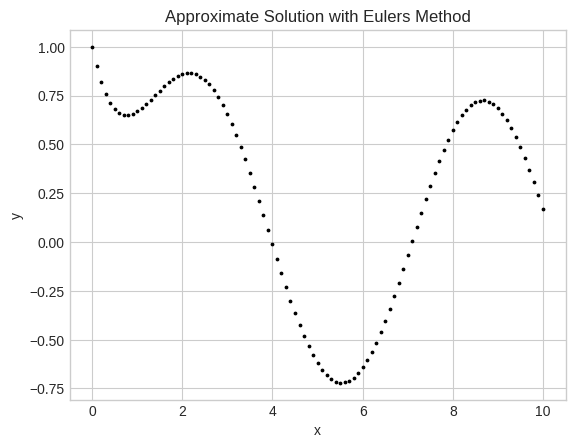

In [8]:
plt.scatter(x, y, color = 'black', s = 3) 
plt.xlabel("x") 
plt.ylabel("y")
plt.title("Approximate Solution with Eulers Method");

**Question 3.** The solution to $\frac{dy}{dx}=-y+\sin(x)\text{, }y(0)=1$ is
$$y=\frac{e^{-x}}{2} (e^{x}\sin(x)-e^{x}\cos(x)+3) $$
Use this information to find the error associated with the Euler approximation when $x=10$.

*use this cell if you need a markdown cell for your response to Q3*

In [9]:
g = lambda x: np.exp(-x)/2* (np.exp(x)*np.sin(x)-np.exp(x)*np.cos(x)+3)
g(10)- y[100]

-0.021372325821737564

## 2. Runge-Kutta

The Runge-Kutta methods evaluate the differential equations multiple times per step to achieve higher order errors. The most popular is the Runge-Kutta method of order 4 (abbreviated "RK4"). The formula for RK4 is

$y_{n+1}=y_n+\frac{h}{6}k_1+\frac{h}{3}k_2+\frac{h}{3}k_3+\frac{h}{6}k_4 =y_n+ \frac{h}{6}(k_1+2k_2+2k_3+k_4)$

where 

$k_1= f(x_n,y_n)$

$k_2= f(x_n+\frac{1}{2}h, y_n+\frac{h}{2}k_1)$

$k_3= f(x_n+\frac{1}{2}h, y_n+\frac{h}{2}k_2)$

$k_4= f(x_n+h, y_n+h k_3)$



**Question 4.** Write a function to implement the fourth order Runge-Kutta method. Then use your RK4 function to solve the same differential equation from above:

$$\frac{dy}{dx}=-y+\sin(x)\text{, }y(0)=1$$

Again, use the initial condition $(0,1)$ and step size $h=0.1$.

Show a graph of the solution and report the $y$-coordinate when $x=10.0$.

0.14759300276200096
-3.0622618413245206e-07


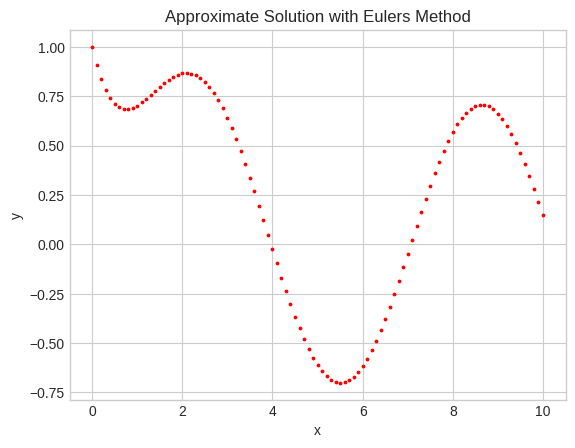

In [10]:
# use this cell for your RK4 code for Q4

def f(x,y):
    return -y+np.sin(x)

y[0] = y0

for i in range(1, n+1):
    k1 = f(x[i-1], y[i-1])
    k2 = f(x[i-1] + 0.5*deltax, y[i-1] + deltax/2*k1)
    k3 = f(x[i-1] + 0.5*deltax, y[i-1] + deltax/2*k2)
    k4 = f(x[i-1] + deltax, y[i-1] + deltax*k3)
    y[i] = y[i-1] + deltax/6*(k1 + 2*k2 + 2*k3 + k4)

plt.scatter(x, y, color = 'red', s = 3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Approximate Solution with Eulers Method");

print(y[-1])

g = lambda x: np.exp(-x)/2*(np.exp(x)*np.sin(x)-np.exp(x)*np.cos(x)+3)

print(y[-1] - g(10))

## 3. Error

Recall the solution to $\frac{dy}{dx}=-y+\sin(x)\text{, }y(0)=1$ is
$$y=\frac{e^{-x}}{2} (e^{x}\sin(x)-e^{x}\cos(x)+3) $$



**Question 5.** Re-run your RK4 method with a step size of $h=0.05$. Now how much error is there associated with the approximate $y$-value when $x=10.0$? Is this what you expect, based on what you know about the error order for RK4?


0.1475932907282668
-1.825991829962348e-08


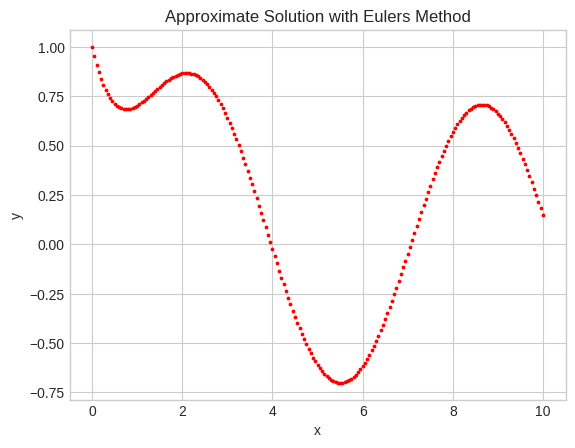

In [11]:
x0 = 0
y0 = 1
xn = 10
n = 200
deltax = 0.05

x = np.linspace(x0, xn, n+1)
y = np.zeros([n+1])

def f(x,y):
    return -y+np.sin(x)

y[0] = y0

for i in range(1, n+1):
    k1 = f(x[i-1], y[i-1])
    k2 = f(x[i-1] + 0.5*deltax, y[i-1] + deltax/2*k1)
    k3 = f(x[i-1] + 0.5*deltax, y[i-1] + deltax/2*k2)
    k4 = f(x[i-1] + deltax, y[i-1] + deltax*k3)
    y[i] = y[i-1] + deltax/6*(k1 + 2*k2 + 2*k3 + k4)

plt.scatter(x, y, color = 'red', s = 3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Approximate Solution with Eulers Method");

print(y[-1])

g = lambda x: np.exp(-x)/2*(np.exp(x)*np.sin(x)-np.exp(x)*np.cos(x)+3)

print(y[-1] - g(10))

*use this cell if you need a markdown cell for your response to Q5*

## 4. Submitting your work
You're done with Lab 09! Submit your work by doing the following:

* Save your notebook

* Restart the kernel and run all cells.

* Right-click the `lab09` file in the navigation pane, then click "download."

* Upload the file you just downloaded to the Lab 09 assignment to Gradescope for Grading.